In [248]:
from typing import List, Dict, Tuple, Callable
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from scipy.special import softmax as sf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Read in the data from the CSV file
df = pd.read_csv('phishing_dataset.csv')
pd.set_option('display.max_columns', None)

df.sample (30)

,domain,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
2928,www.itgovernance.co.uk/catalog/143,232475,0,0,0,34,0,0,0,22,3,0
42947,dogstar.it/stellamarina/fotoshow-index/images/...,10000000,0,1,730,55,0,0,0,10,1,1
5391,www.pref.nagano.lg.jp/gaikokugo/prefectural/ma...,10000000,0,0,0,57,0,0,0,21,4,0
22361,member.paypal.com.cgi.bin.webscr.cmd.flow.sess...,10000000,0,0,0,151,0,0,0,150,12,1
28831,https-pay-pai.help.sec.us-login-cgi.bin.resolu...,10000000,0,0,0,145,0,0,1,111,10,1
50723,membres.multimania.fr/varkhancd/dev/RPL/,10000000,0,0,0,40,0,0,0,21,2,0
13172,blogs.scriptologist.com/portal.php,485581,0,1,6210,34,0,0,0,23,2,0
54709,affy.blogspot.com/p5be/index.htm,11,0,1,7305,32,0,0,0,17,2,0
69434,www.servicetechdecksupport.com/Luis/accounts.g...,10000000,0,0,0,77,0,0,0,30,2,1
55344,tuliobotero.edu.co/administrator/includes/chec...,10000000,0,0,0,51,0,0,0,18,2,1


In [249]:
X = df.iloc[:,1:-1] 
X.sample (3)

,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain
94325,148229,0,1,6210,26,0,0,0,11,1
80210,10000000,0,0,0,20,0,0,0,19,3
418,10000000,0,1,4018,17,0,0,0,9,1


In [252]:
y = df.iloc[:,-1]
y.sample (3)

61730    0
21019    0
70297    1
Name: label, dtype: int64

In [254]:
def get_train_valid_test_data(
    X: np.ndarray, 
    y: np.ndarray, 
):
    """ Randomizes and then splits the data into train, validation, and test sets.

        Args:
            X: Data given as a 2D matrix

            y: Labels given as a vector 
    """
    X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, train_size=.8, random_state=42)
    X_trn, X_vld, y_trn, y_vld = train_test_split(X_trn, y_trn, train_size=.8, random_state=42)

    return X_trn, y_trn, X_vld, y_vld, X_tst, y_tst

In [256]:
def get_preprocessed_data() -> Tuple[np.ndarray]:
    """ Gets preprocessed data for training, validation, and testing

        Return:
            A tuple of NumPy arrays where indices 0-1 
            contain the training data/targets, indices 2-3
            contain the validation data/targets, and 4-5
            contain the testing data/targets.
    """
    encoder = OneHotEncoder(sparse_output=False)
    fake_y = np.array(y).reshape(-1, 1)
    n_values = np.max(fake_y) + 1
    fake_Y = np.eye(n_values)[fake_y.flatten()]
    print(f"one_hot shape: {fake_Y.shape}")
    print(fake_Y)
    X_trn, y_trn, X_vld, y_vld, X_tst, y_tst= get_train_valid_test_data(X, fake_Y)
    # TODO 3.1 - 3.4
    scaler = StandardScaler()
    scaler.fit(X_trn)
    X_trn = scaler.transform(X_trn)
    X_vld = scaler.transform(X_vld)
    X_tst = scaler.transform(X_tst)


    num_rows, num_cols = X_trn.shape
    bias = np.ones((num_rows, 1))
    X_trn = np.hstack((bias, X_trn))

    num_rows, num_cols = X_vld.shape
    bias = np.ones((num_rows, 1))
    X_vld = np.hstack((bias, X_vld))

    num_rows, num_cols = X_tst.shape
    bias = np.ones((num_rows, 1))
    X_tst = np.hstack((bias, X_tst))

    return X_trn, y_trn, X_vld, y_vld, X_tst, y_tst

In [258]:
X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = get_preprocessed_data()

print(f"X_trn shape: {X_trn.shape}")
print(f"y_trn shape: {y_trn.shape}")

print(f"X_vld shape: {X_vld.shape}")
print(f"y_vld shape: {y_vld.shape}")
    
print(f"X_tst shape: {X_tst.shape}")
print(f"y_tst shape: {y_tst.shape}")

one_hot shape: (95910, 2)
[[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]]
X_trn shape: (61382, 11)
y_trn shape: (61382, 2)
X_vld shape: (15346, 11)
y_vld shape: (15346, 2)
X_tst shape: (19182, 11)
y_tst shape: (19182, 2)


In [260]:
def plot_confusion_matrix(
    y: np.ndarray, 
    y_hat: np.ndarray, 
    class_names: Dict[int, str] = None
) -> pd.DataFrame:
    """ Plots a pretty and labeld version of Sklerarn's confusion matrix

        Args:
            y: Ground truth labels given as a 1D vector

            y_hat: Predicted labels given as a 1D vector

            class_names: Dictionary mapping labels to class names.

                Example: {0: 'setosa', 1: 'versicolor', 2: 'virginica'}

        Returns:
            A confusion matrix casted as a DataFrame
    """
    y =  y.flatten() # reshape to make 1D vector for consistency
    y_hat = y_hat.flatten() # reshape to make 1D vector for consistency
    
    cfm = confusion_matrix(y_true=y, y_pred=y_hat)    
    
    labels = np.sort(np.unique(y))
    if class_names is not None:
        classes = []
        for l in labels:
            class_name = class_names.get(l, l)
            classes.append(class_name)
        labels = classes
    
    
    columns, index = labels, labels
    print("check", columns)
    cfm_df = pd.DataFrame(cfm, index=index, columns=columns)
    sns.heatmap(cfm_df, annot=True, fmt='g')
    plt.show()
    return cfm_df

In [294]:
def sigmoid(z: np.ndarray) -> np.ndarray:
    # TODO 4
    return (np.power(np.e, z))/(1 +np.power(np.e, z))

In [296]:
def softmax(z: np.ndarray) -> np.ndarray:
    """ Computes the stablized version of the softmax

        Args:
            z: A vector or matrix of continuous values.

        Return:
            A NumPy array with the same shape as the input.
    """
    # TODO 5
    
    return sf(z, axis=1)

In [268]:
rng = np.random.RandomState(0)
z = rng.rand(1, 3)
print(f"z shape: {z.shape}")
print(f"z:\n{z}\n")

probs = softmax(z)
print(f"probs shape: {probs.shape}")
print(f"probs:\n{probs}\n")

z shape: (1, 3)
z:
[[0.5488135  0.71518937 0.60276338]]

probs shape: (1, 3)
probs:
[[0.30898065 0.36491138 0.32610797]]



In [270]:
rng = np.random.RandomState(0)
Z = rng.rand(5, 3)
print(f"Z shape: {Z.shape}")
print(f"Z:\n{Z}\n")
    
probs = softmax(Z)
print(f"probs shape: {probs.shape}")
print(f"probs:\n{probs}\n")

Z shape: (5, 3)
Z:
[[0.5488135  0.71518937 0.60276338]
 [0.54488318 0.4236548  0.64589411]
 [0.43758721 0.891773   0.96366276]
 [0.38344152 0.79172504 0.52889492]
 [0.56804456 0.92559664 0.07103606]]

probs shape: (5, 3)
probs:
[[0.30898065 0.36491138 0.32610797]
 [0.33421115 0.29605481 0.36973403]
 [0.23434743 0.36907156 0.396581  ]
 [0.27316453 0.41090326 0.31593222]
 [0.3291452  0.47062004 0.20023476]]



In [272]:
def nll_loss(y: np.ndarray, probs: np.ndarray) -> float:
    """ Computes the average generalized NLL Loss

        Args:
            y: The ground truth one-hot encoded labels
                given as matrix of shape (M, |K|).

            probs: The predicted probabilities for the
                corresponding labels given as a matrix
                of shape (M, |K|)
    """
    # TODO 6
    num_rows, num_cols = y.shape
    return (-1/num_rows) * (np.sum(y * np.log(probs)))

In [274]:
def get_batches(
    data_len: int, 
    batch_size: int = 32,
) -> List[np.ndarray]:
    """ Generates mini-batches based on the data indexes
        
        Args:
            data_len: Length of the data or number of data samples 
                in the data. This is used to generate the indices of
                the data.
            
            batch_size: Size of each mini-batch where the last mini-batch
                might be smaller than the rest if the batch_size does not 
                evenly divide the data length.

        Returns:
            A list of NumPy array's holding the indices of batches
    """
    indices = np.arange(data_len)
    np.random.shuffle(indices)
    batches = [indices[i:i+batch_size] for i in range(0, data_len, batch_size)]

    return batches

In [276]:
class SoftmaxRegression():
    """ Performs softmax regression using gradient descent
    
        Attributes:

            alpha: learning rate or step size.
                
            batch_size: Size of mini-batches for mini-batch gradient
                descent.
            
            epochs: Number of epochs to run for mini-batch
                gradient descent.
                
            seed: Seed to be used for NumPy's RandomState class
                or universal seed np.random.seed() function.

            W: Matrix of weights with shape (N, |K|) 

            trn_loss: Stores the training loss for each epoch.

            vld_loss: Stores the validation loss for each epoch.
    """
    def __init__(
        self, 
        alpha: float,
        batch_size: int,
        epochs: int = 1,
        seed: int = 0,
    ):

        self.alpha = alpha
        self.batch_size = batch_size
        self.epochs = epochs
        self.seed = seed
        
        self.W = None
        self.trn_loss = None
        self.vld_loss = None
    
    def fit(
         self, 
         X: np.ndarray, 
         y: np.ndarray, 
         X_vld: np.ndarray=None, 
         y_vld: np.ndarray=None
     ) -> object:
        """
            Args:
                X: Training features/data
                y: Training labels
                X_vld: Validation features/data
                y_vld: Validation labels
                seed: Seed used for initializing weights
        """
        # Set seed for reproducibility
        np.random.seed(self.seed)
        # Track training/validation loss
        self.trn_loss = []
        self.vld_loss = []

        # TODO 7.1
        num_rows_X, num_cols_X = X.shape
        num_rows_y, num_cols_y = y.shape
        self.W = np.random.rand(num_cols_X, num_cols_y)

        for e in range(self.epochs):
            batches = get_batches(num_rows_X, self.batch_size)
            for b in batches: 
                Z = X[b] @ self.W
                y_hat_probs = softmax(Z)
                self.W = self.W - self.alpha * ((1/b.size) * X[b].T @ (y_hat_probs - y[b]))
            XW = softmax(X @ self.W)
            self.trn_loss.append(nll_loss(y=y, probs=XW))
            if X_vld is not None and y_vld is not None:
                f_vld_XW = softmax(X_vld @ self.W)
                self.vld_loss.append(nll_loss(y=y_vld, probs=f_vld_XW))
        return self
        
    def predict(self, X: np.ndarray) -> np.ndarray:
        """ Make predictions using learned weights

            Args:
                X: Testing data given as a 2D matrix

            Returns:
                A 2D column vector of predictions for each data sample in X
        """
        # TODO 7.2
        return np.argmax(X @ self.W, axis=1, keepdims=True)

one_hot shape: (95910, 2)
[[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]]
Training Accuracy: 0.8766739435013522


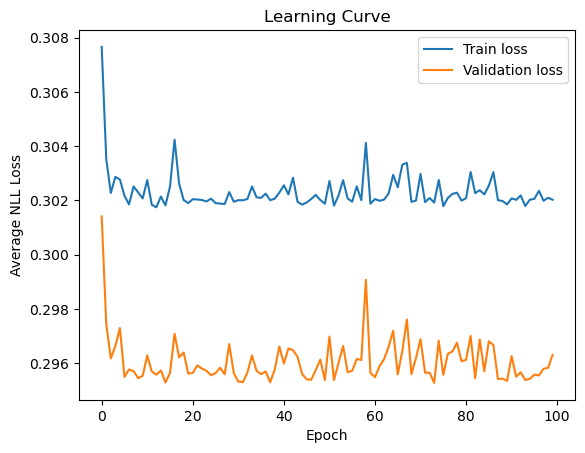

check [0 1]


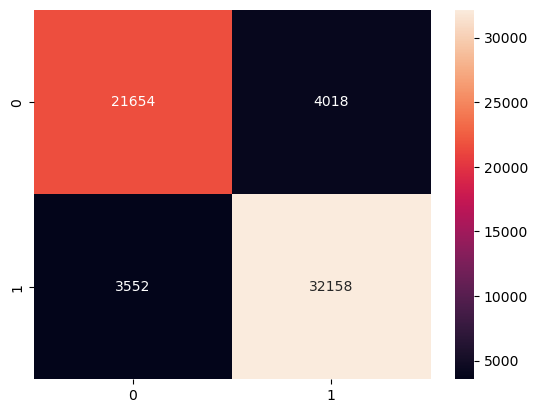

In [278]:
X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = get_preprocessed_data()
softreg = SoftmaxRegression(epochs=100, batch_size=64, alpha=.1, seed=42)
softreg.fit(X_trn, y_trn, X_vld=X_vld, y_vld=y_vld)
y_hat = softreg.predict(X_trn)

acc = accuracy_score(np.argmax(y_trn, axis=1), y_hat)
print(f"Training Accuracy: {acc}")



plt.plot(softreg.trn_loss, label='Train loss')
plt.plot(softreg.vld_loss, label='Validation loss')
plt.title("Learning Curve")
plt.ylabel("Average NLL Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

cfm_df = plot_confusion_matrix(
    y=np.argmax(y_trn, axis=1), 
    y_hat=y_hat, 
);

Training Accuracy: 0.8819887918675876
check [0 1]


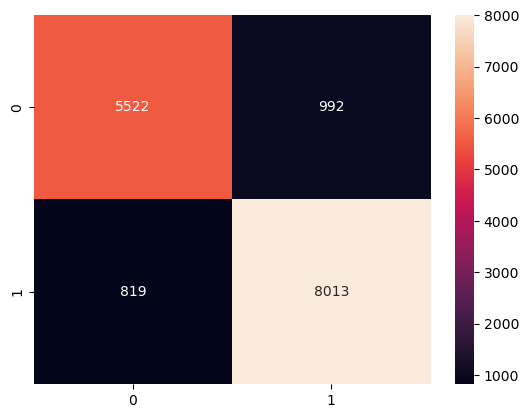

In [280]:
y_hat = softreg.predict(X_vld)

acc = accuracy_score(np.argmax(y_vld, axis=1), y_hat)
print(f"Training Accuracy: {acc}")

cfm_df = plot_confusion_matrix(
    y=np.argmax(y_vld, axis=1), 
    y_hat=y_hat, 
);

Training Accuracy: 0.8800437910541132
check [0 1]


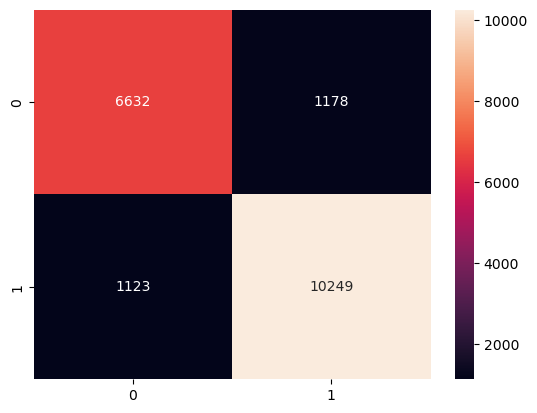

In [282]:
y_hat = softreg.predict(X_tst)

acc = accuracy_score(np.argmax(y_tst, axis=1), y_hat)
print(f"Training Accuracy: {acc}")

cfm_df = plot_confusion_matrix(
    y=np.argmax(y_tst, axis=1), 
    y_hat=y_hat, 
);

In [284]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, train_size=0.67, random_state=133)

feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(n_estimators=225)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
y_score2 = forest.predict_proba(X_test)[:,1]

Accuracy score for Random Forest:  0.9894839243709027


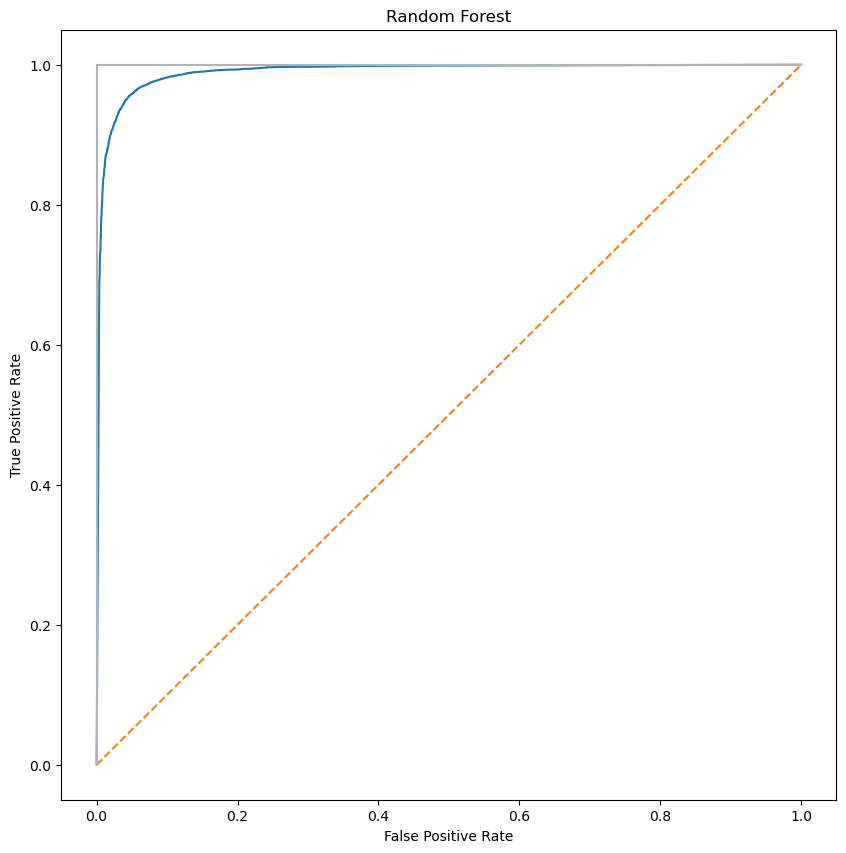

In [292]:
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)
print('Accuracy score for Random Forest: ', roc_auc_score(y_test, y_score2))


plt.subplots(1, figsize=(10,10))
plt.title('Random Forest')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()